# Linear Regression

In this notebook, we will go through the linear regression algorithms to estimate the price of houses in Boston.

First, it is shown how to compute the predictions using a single feature. Later on, the predictions are expanded for multiple features. In both cases, I will compare my predictions with the Turicreate outputs.

# Linear regression with a single feature

In the first part, let's run the Turicreate linear regression algorithm to understand is functionality.

In [1]:
import turicreate as tc
import csv
import pandas as pd    
import numpy as np  
import matplotlib.pyplot as plt
%matplotlib inline

Loading data

In [2]:
data = tc.SFrame('BostonHousing.csv')

Finished parsing file /mnt/c/Users/marle/OneDrive/Machine_Learning/Linear_Regression/BostonHousing.csv

Parsing completed. Parsed 100 lines in 0.112165 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,float,int,float,int,int,float,int,int,int,int,int,int,int,int,int,float,float,int,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /mnt/c/Users/marle/OneDrive/Machine_Learning/Linear_Regression/BostonHousing.csv

Parsing completed. Parsed 21613 lines in 0.131767 secs.

Taking a look at the loaded data

In [3]:
data

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view
7129300520,20141013T000000,221900.0,3,1.0,1180,5650,1.0,0,0
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0
5631500400,20150225T000000,180000.0,2,1.0,770,10000,1.0,0,0
2487200875,20141209T000000,604000.0,4,3.0,1960,5000,1.0,0,0
1954400510,20150218T000000,510000.0,3,2.0,1680,8080,1.0,0,0
7237550310,20140512T000000,1225000.0,4,4.5,5420,101930,1.0,0,0
1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0
2008000270,20150115T000000,291850.0,3,1.5,1060,9711,1.0,0,0
2414600126,20150415T000000,229500.0,3,1.0,1780,7470,1.0,0,0
3793500160,20150312T000000,323000.0,3,2.5,1890,6560,2.0,0,0


Spliting data into training and testing sets

In [4]:
train_data, test_data = data.random_split(0.8)

Creating a model using the turicreate.linear_regression.create using the living square feet size as the feature.

In [5]:
# model = tc.linear_regression.create(train_data, target='price',
#                                     features = ['bedrooms',
#                                                 'bathrooms',
#                                                 'sqft_living',
#                                                 'sqft_lot',
#                                                 'yr_built',
#                                                 'condition'])
model = tc.linear_regression.create(train_data, target='price', features = ['sqft_living'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16488

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 2        | 1.008238     | 4347156.187728     | 3020827.667369       | 262054.789179 | 276343.822217   |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

SUCCESS: Optimal solution found.

Making the predicitons

In [6]:
predictions = model.predict(test_data)

Evaluating the predictions

In [7]:
results = model.evaluate(test_data)

In [8]:
print results

{'max_error': 2268053.3428657735, 'rmse': 255957.18230272795}


Plotting the model

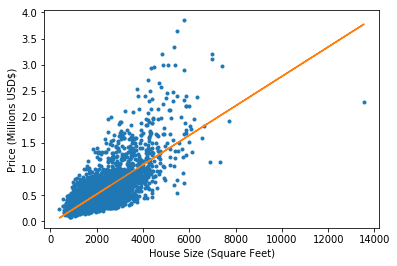

In [9]:
plt.plot(test_data['sqft_living'], test_data['price']/1000000,'.',
         test_data['sqft_living'], predictions/1000000,'-')
plt.ylabel('Price (Millions USD$)')
plt.xlabel('House Size (Square Feet)')
plt.show()

Making a prediction for a single value.

In [10]:
size_to_predict = 15000
forecast = model.predict(tc.SFrame({'sqft_living':[size_to_predict]}))
print forecast

[4184714.291197534]


# Now, let's create our own function

We want to fit a line that best estimates all the values in the training set. For that, we need to find 2 parameters: the slope and the intercept. The equation of the line is:

$$y_{i}^{,}(x_i) = w_0 + w_{1}*x_i$$

Now, we want to find the parameters $w_0$ and $w_1$ that reduces the cost function (the sum of the squared difference between measured data $y_i$ to the predicted data $y_{i}^{,}$):

$$RSS(w_0,w_1) = \sum_{i=1}^{N}(y_i - y_{i}^{,})^2 = \sum_{i=1}^{N}(y_i - [w_0 + w_{1}*x_i])^2$$

Minimizing the cost function means to take the derivative of cost function for each parameter ($w_0$ and $w_1$) and make it equal to zero. This leads to 2 simple formulas for $w_0$ and $w_1$:

$$w_0 = \frac{\sum_{i=1}^{N}y_i}{N} - w_{1}\frac{\sum_{i=1}^{N}x_i}{N}$$

$$w_1 = \frac{\sum_{i=1}^{N}y_{i}x_{i} - \frac{\sum_{i=1}^{N}y_{i}\sum_{i=1}^{N}x_{i}}{N}}{\sum_{i=1}^{N}x_{i}^2 - \frac{\sum_{i=1}^{N}x_{i}\sum_{i=1}^{N}x_{i}}{N}}$$

With the equations above, it is possible to compute the intercept ($w_0$) and the slope ($w_1$) that best predict the output $(y_{i}^{'})$ given the input $x_i$ and the measured data $y_i$ (for one feature only).

Now, let's create the function that gets the input feature $x_i$ and the measured data $y_i$ of the training set, and return the intercept $w_0$ and the slope $w_1$.

In [11]:
def linear_regression_single(input_feature, measured_data):
    # First, let's compute the sums and squared sums of the parameters equations
    Isum = input_feature.sum()
    Msum = measured_data.sum()
    IMsum = sum([input_feature[i]*measured_data[i] for i in range(len(input_feature))])
    IIsum = sum([input_feature[i]*input_feature[i] for i in range(len(input_feature))])

    # We need to compute the slope first
    num = IMsum-(1./len(input_feature)*(Isum*Msum))
    den = IIsum-(1./len(input_feature)*(Isum*Isum))
    slope = num/den
    
    # Now that we have the slope, we can compute the intercept
    intercept = (1./len(input_feature))*Msum-slope*Isum*(1./len(input_feature))
    
    # Return the parameters
    return (intercept, slope)

Let's check our function

In [12]:
intercept_1, slope_1 = linear_regression_single(train_data['sqft_living'], train_data['price'])

print "Intercept: " + str(intercept_1)
print "Slope: " + str(slope_1)

Intercept: -47351.0629143
Slope: 283.138395402


Those values look close to the ones obtained by using the Turicreate.

The next step is to calculate the estimations $y_{i}^{,}$ by using the linear equation:

$$y_{i}^{,}(x_i) = w_0 + w_{1}*x_i$$

Let's create a function that gets the input feature $x_i$ and the measured data $y_i$. It needs to estimate the intercept $w_0$ and slope $w_1$ and calculate the predictions $y_{i}^{,}$ using the linear equation above.

In [13]:
def regression_predictions_single(input_feature, measured_data, single_input = 0):
    # First, we need to estimete the intercept and the slope
    intercept, slope = linear_regression_single(input_feature, measured_data)
    
    # Now, compute the predictions
    predicted_values = intercept + slope*input_feature
    
    # Computing single prediction to compare functions
    single_prediction = 0
    if single_input != 0:
        single_prediction = intercept + slope*single_input
        
    # Return outputs
    return predicted_values, single_prediction

The following function has the input feature, slope and intercept as input so the can estimate the parameters in the training data and make predictions in the testing data.

In [14]:
def regression_predictions_single_test(input_feature, slope, intercept, single_input = 0):
    # In this functions, we input the slope and intercept, so we can make predictions on the testing set
    predicted_values = intercept + slope*input_feature

    # Computing single prediction to compare functions
    single_prediction = 0
    if single_input != 0:
        single_prediction = intercept + slope*single_input
        
    # Return outputs
    return predicted_values, single_prediction

Let's test our function:

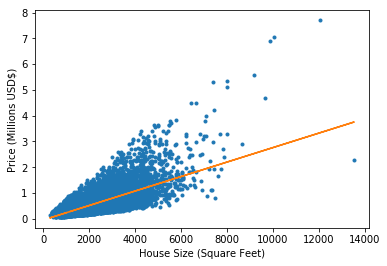

In [15]:
predictions, single_prediction = regression_predictions_single(data['sqft_living'], data['price'], size_to_predict)

plt.plot(data['sqft_living'], data['price']/1000000,'.',
         data['sqft_living'], predictions/1000000,'-')
plt.ylabel('Price (Millions USD$)')
plt.xlabel('House Size (Square Feet)')
plt.show()

Above, we did a linear regression for the whole dataset. Below, we are using the slope and intercept estimated in the training data to make estimations over the testing data.

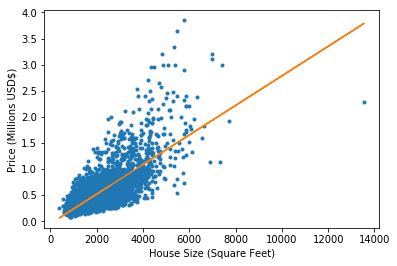

In [16]:
predictions2, single_prediction2 = regression_predictions_single_test(test_data['sqft_living'], slope_1, intercept_1, size_to_predict)

plt.plot(test_data['sqft_living'], test_data['price']/1000000,'.',
         test_data['sqft_living'], predictions2/1000000,'-')
plt.ylabel('Price (Millions USD$)')
plt.xlabel('House Size (Square Feet)')
plt.show()

In [17]:
print single_prediction2
print forecast

4199724.86812
[4184714.291197534]


Again, it is very similar to the estimation we get with the Turicreate. But we did all for only a single feature. How do we proceed having multiple features? But before going for multiple features, we need to evaluate our predictions. One way to evaluate the prediction model, is to calculate the **_Residual sum of squares_** (RSS).

$$RSS(w_0,w_1) = \sum_{i=1}^{N}(y_i - [w_0 + w_{1}*x_i])^2$$

Let's create the function that computes the RSS by inputing the predictions $y_{i}^{,}$ and the measured data $y_i$. 

In [18]:
def calculate_RSS(predictions,measured_data):
    # First, let's calculate the residuals (difference between measured and predictated data)
    residuals = measured_data - predictions
    
    # Compute RSS
    RSS = sum([residuals[i]*residuals[i] for i in range(len(residuals))])
    
    # Return RSS
    return(RSS)

Let's check our RSS

In [19]:
rss_test = calculate_RSS(predictions2,test_data['price'])

print rss_test

2.79659455084e+14


# Linear regression with multiple features

In progress